In [1]:
from astropy.io import fits as astro_fits  
from astropy.io.fits import getdata

import copy
import glob

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from IPython.display import HTML

import astropy.table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.visualization import AsymmetricPercentileInterval, ImageNormalize, LogStretch 

#These packages are for Using TrackPy
import matplotlib.pyplot as plt 
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp 

from numpy import sqrt 


In [2]:
List_2 = glob.glob(r'C:\Users\14242\2022 Summer Internship\Sun Pics Part 2 (10 pics)\*')

In [3]:
data_average = [] 
data_median = [] 
for Polar in List_2: 
    Polardata = getdata(Polar) 
    data_average.append(Polardata - np.average(Polardata)) 
    data_median.append(Polardata - np.median(Polardata)) 

In [4]:
Arr=np.array(data_average)

In [5]:
#For this I want to know how to create a loop for the difference
Diff = Arr[2] - Arr[1]

In [6]:
#To look how Diff would look like
#Diff

In [7]:
Diff = [] 
for i in range (1,len(Arr)-1): 
    Diff.append(Arr[i+1]-Arr[i])

In [8]:
#Just a plot for the Difference from the start

#plt.figure(figsize=(10,10))
#plt.imshow(Diff[0],vmin = -1, vmax = 1)  
#plt.colorbar()
#plt.show()

In [9]:
#TrackPy Images 
f = tp.locate(Arr[0], 11,invert = False )

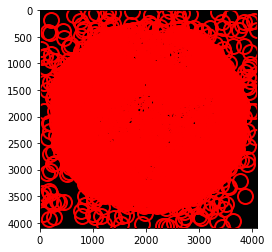

In [10]:
#like this because it is super bright
tp.annotate(f,Arr[0]);

In [11]:
#This is to clean up the graph  
#Talk to Milo about the limits of the minmass
f = tp.locate(Arr[0], 11, invert = True, minmass = 70)

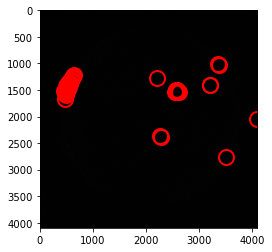

In [12]:
#This gives us the graph
tp.annotate(f,Arr[0]); 

In [13]:
#print(f)

In [24]:
#This is to find the specific  data for the one partical(easier to look at data)
f.iloc[34]

y           1504.197090
x           2591.875661
mass          75.525738
size           2.434594
ecc            0.321339
signal         4.395678
raw_mass   -1181.546494
ep            -0.089743
Name: 15440, dtype: float64

In [23]:
#Just created an array for the original radius of the sun. 
R = 1625.691406

In [30]:
#This is a equation for the radius of the particals INSIDE of the Circle 
for i in f: 
    r = np.sqrt((f[i]['X']- 2070.828369)**2 + (f[i]['Y'] - 2008.760620)**2)
    if r>R: 
        print ('Delete')
    

KeyError: 'X'

In [ ]:
#Use trackPy/Sunpy and look at the header for the new dimentions of the  
#Diagram, with this we can use restrictions and track the partical

In [ ]:
#Tells us the frames and features of the photos
#r = tp.batch(Arr[:10],11,minmass = 50, invert = True); 


In [ ]:
# The 5 here is the max displacement that the partical can trael 
#This tends to be small so it dosnet slow down the program  
#memeory means the amount of frames that the partical can be missed 
#this is useful to give us the partical within the header
t = tp.link(r,5,memory = 9)

In [ ]:
t.head 

In [ ]:
#This code with (t,5) filters out the particals that are spontanious 
#Will have to look at the data to see what frames are considered spontanious
t1 = tp.filter_stubs(t,5) 
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

plt.figure()
tp.mass_size(t1.groupby('particle').mean());

In [ ]:
#Plots those figures mass and size
plt.figure()
tp.mass_size(t1.groupby('particle').mean())

In [ ]:
#This cell will be for the code to filter out the particals that are not needed 
t2 = t1[((t1['mass'] >60 ) & (t1['size'] < 3.1) &
         (t1['ecc'] < 1))]

In [ ]:
plt.figure()
tp.annotate(t2[t2['frame'] == 0], Arr[1]);


In [ ]:
plt.figure()
tp.plot_traj(t2); 

In [31]:
#Now this code will be to hopefully grap the final pic 


In [32]:
#This code is to apply the filter 
#t3 = tp.filter_stubs(i,25)

In [33]:
#Code for graphing final product 
#plt.figure() 
#tp.annotate(i,frames[0])

In [34]:
#Next code is for graphing the light waves
# Using mathplotlib but package is LightCurve

In [35]:
#import lightcurve 

In [36]:
#This is the tedious stuff jsut sub in the stuff for my data

#fig = plt.figure(figsize=(15, 5))
#ax = fig.add_subplot(1, 1, 1)

#datasets = glob.glob('data/lc1v?????_x1d.fits')
#datasets.sort()

#for item in datasets:
    #hdu = fits.open(item)
    #ax.plot(hdu[1].data['wavelength'].ravel(), hdu[1].data['flux'].ravel())
    
#ax.set_ylim(0, 3e-14)
#ax.set_xlim(1000, 2200)
#ax.set_xlabel('Wavelength')
#ax.set_ylabel('Flux')
#ax.set_title('Dispersed spectra from 4 sequential datasets')